<a href="https://colab.research.google.com/github/radianade2/RADIANAS_COLAB/blob/tugas/tubesAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import tree

In [3]:
dataset = pd.read_csv('/content/arrhythmia_data2.csv', sep=",", header=None)
dataset.columns = range(1, len(dataset.columns) + 1)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 1 to 280
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [5]:
dataset.describe()

,1,2,3,4,5,6,7,8,9,10,...,271,272,273,274,275,276,277,278,279,280
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [6]:
dataset.head()

,1,2,3,4,5,6,7,8,9,10,...,271,272,273,274,275,276,277,278,279,280
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [7]:
dataset.tail()

,1,2,3,4,5,6,7,8,9,10,...,271,272,273,274,275,276,277,278,279,280
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


In [8]:
nama_kolom = dataset.select_dtypes(include=[np.number])
nama_kolom.columns

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            271, 272, 273, 274, 275, 276, 277, 278, 279, 280],
           dtype='int64', length=275)

In [9]:
dataset.shape

(452, 280)

In [10]:
pd.isnull(dataset).sum().sum()

0

In [11]:
dataset = dataset.replace('?', np.NaN)

In [12]:
missing_val=pd.isnull(dataset).sum().sum()
missing_val

408

Text(0, 0.5, 'Total Missing Attribute Values')

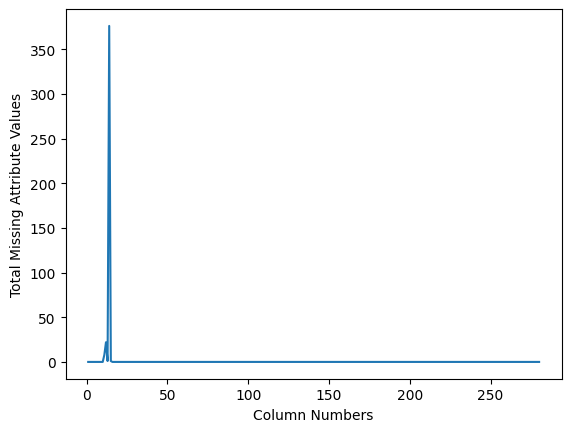

In [13]:
pd.isnull(dataset).sum().plot()
plt.xlabel('Column Numbers')
plt.ylabel('Total Missing Attribute Values')

Text(0, 0.5, 'Total Missing Attribute Values')

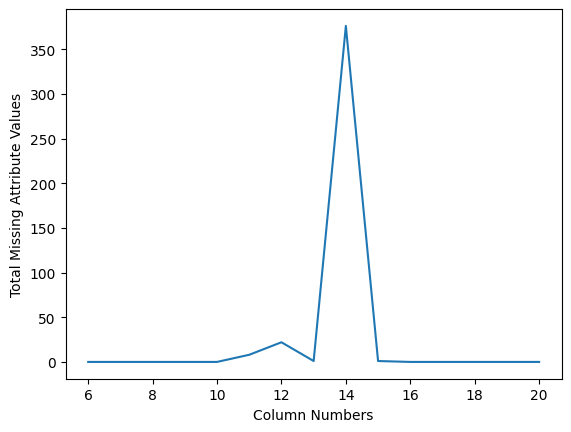

In [14]:
pd.isnull(dataset).sum()[5:20].plot(kind="line")
plt.xlabel('Column Numbers')
plt.ylabel('Total Missing Attribute Values')

In [15]:
dataset.drop(columns=14, inplace=True)

In [16]:
new_dataset = dataset.copy()

In [17]:
new_dataset.shape

(452, 279)

In [18]:
class_names = ["Normal",
               "Ischemic changes (Coronary Artery Disease)",
               "Old Anterior Myocardial Infraction",
               "Old Inferior Myocardial Infraction",
               "Sinus tachycardy",
               "Sinus bradycardy",
               "Ventricular Premature Contraction (PVC)",
               "Supraventricular Premature Contraction",
               "Left Boundle branch block",
               "Right boundle branch block",
               "1.Degree AtrioVentricular block",
               "2.Degree AV block",
               "3.Degree AV block",
               "Left Ventricule hypertrophy",
               "Atrial Fibrillation or Flutter",
               "Others"]

In [19]:
t=new_dataset.sort_values(by=[280])
la = t[280].value_counts(sort=False).tolist()
values = la[0:10]
values.extend([0,0,0])
values.extend(la[10:13])
print(values)

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 0, 0, 0, 4, 5, 22]


In [21]:
import math as mt

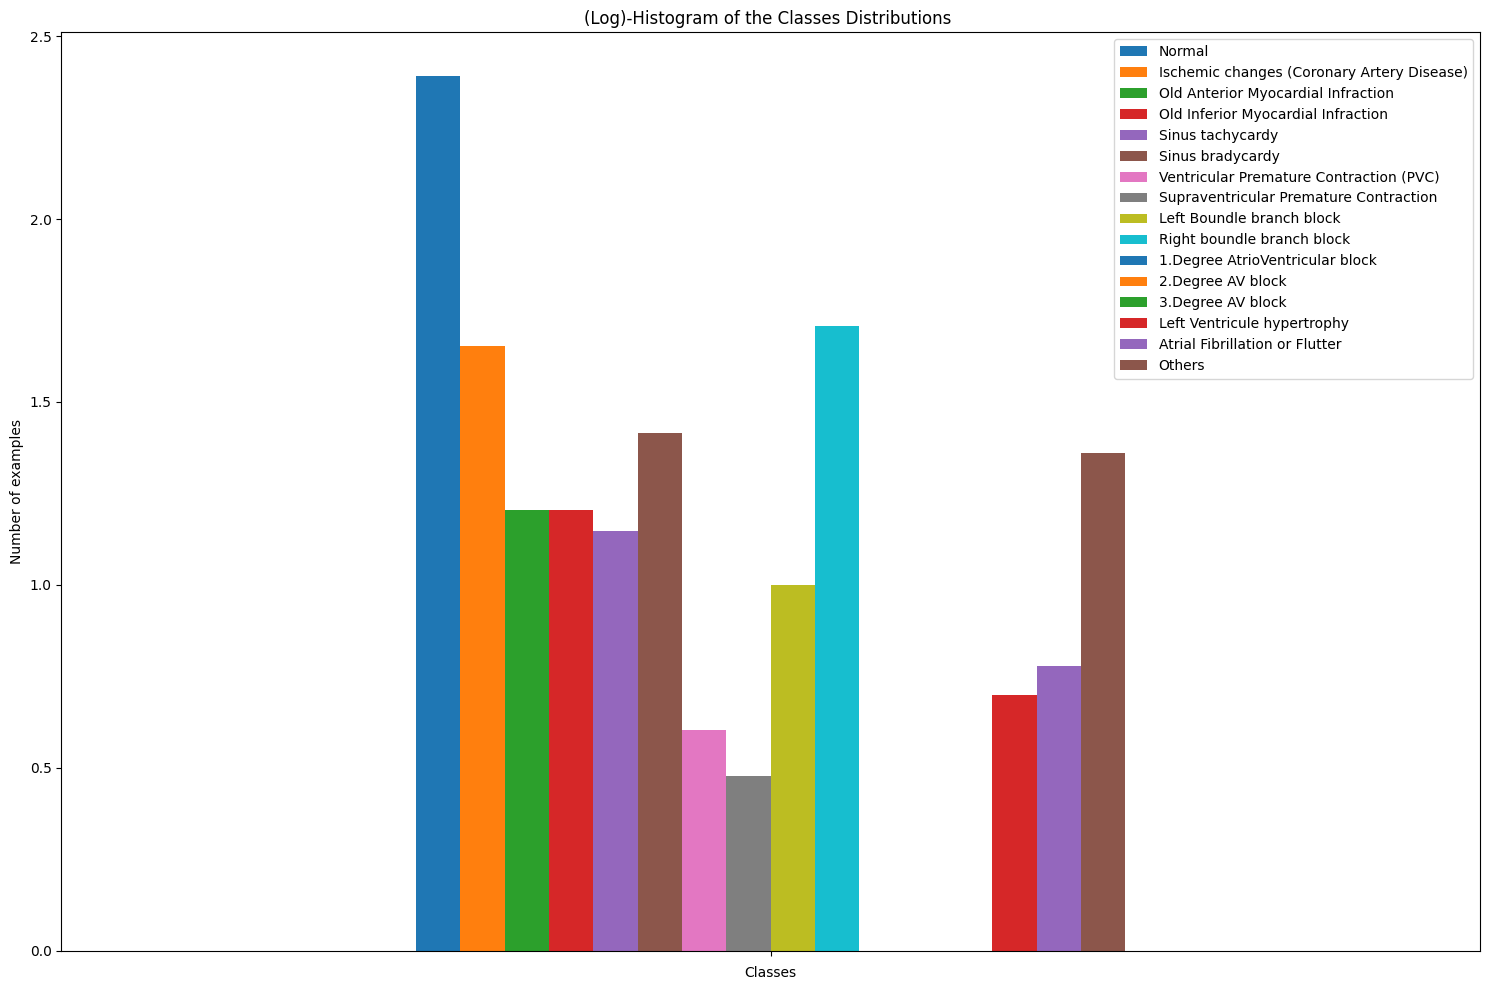

In [22]:
labels = class_names
Log_Norm = []
for i in values:
    Log_Norm.append(mt.log10(i+1))
fdict = {}
j = 0
for i in labels:
    fdict[i] = Log_Norm[j]
    j+=1
fdf = pd.DataFrame(fdict,index=[0])
fdf = fdf.rename(index={0: ''})
fig, ax = plt.subplots(figsize=(15,10))
fdf.plot(kind="bar",ax=ax)
ax.set_title("(Log)-Histogram of the Classes Distributions ")
ax.set_ylabel('Number of examples')
ax.set_xlabel('Classes')
fig.tight_layout()
plt.show()

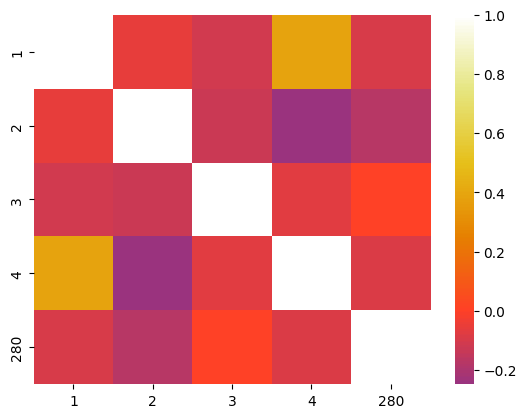

In [23]:
sns.heatmap(new_dataset[[1, 2, 3, 4, 280]].corr(), cmap='CMRmap',center=0)
plt.show()

In [24]:
missing_value = (col for col in new_dataset.columns if new_dataset[col].isnull().any())
for col in missing_value:
    new_dataset[col] = new_dataset[col].isnull()

In [25]:
from sklearn.impute import SimpleImputer

In [26]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
new_dataset = pd.DataFrame(imputer.fit_transform(new_dataset))
new_dataset.columns = dataset.columns

In [27]:
pd.isnull(new_dataset).sum().sum()

0

In [30]:
target = new_dataset[280]

data = new_dataset.drop(columns=280)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1)

In [32]:
from sklearn.preprocessing import StandardScaler
hitung = StandardScaler()

hitung.fit(X_train)
X_train = hitung.transform(X_train)
X_test = hitung.transform(X_test)

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,classification_report

In [34]:
from sklearn.neighbors import KNeighborsClassifier
klasifikasi_knn = KNeighborsClassifier(n_neighbors=4)
klasifikasi_knn.fit(X_train, y_train)
prediksi_knn = klasifikasi_knn.predict(X_test)

In [35]:
train_score_knn = recall_score(y_train, klasifikasi_knn.predict(X_train),average='weighted')
test_score_knn = recall_score(y_test, klasifikasi_knn.predict(X_test),average='weighted')
akurasi_train_knn = accuracy_score(y_train, klasifikasi_knn.predict(X_train))
akurasi_test_knn = accuracy_score(y_test, klasifikasi_knn.predict(X_test))

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
print('Train Score KNN: {}'
      .format(train_score_knn))
print('Test Score KNN: {}'
      .format(test_score_knn))
print(classification_report(y_test, prediksi_knn))
confusion_matrix(y_test, prediksi_knn)

Train Score KNN: 0.6537396121883656
Test Score KNN: 0.6373626373626373
              precision    recall  f1-score   support

         1.0       0.63      0.98      0.77        52
         2.0       1.00      0.12      0.22         8
         3.0       1.00      0.50      0.67         4
         4.0       1.00      1.00      1.00         1
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         3
         7.0       0.00      0.00      0.00         1
         9.0       1.00      0.50      0.67         2
        10.0       1.00      0.20      0.33        10
        14.0       0.00      0.00      0.00         2
        16.0       0.00      0.00      0.00         6

    accuracy                           0.64        91
   macro avg       0.51      0.30      0.33        91
weighted avg       0.63      0.64      0.55        91



array([[51,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 7,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1],
       [ 8,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0]])

In [38]:
from sklearn.tree import DecisionTreeClassifier
klasifikasi_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 1, max_depth=5)
klasifikasi_dt.fit(X_train, y_train)
prediksi_test = klasifikasi_dt.predict(X_test)
prediksi_train = klasifikasi_dt.predict(X_train)

In [39]:
train_score_dt = recall_score(y_train, prediksi_train, average="weighted")
test_score_dt = recall_score(y_test, prediksi_test, average="weighted")
akurasi_train_dt = accuracy_score(y_train, prediksi_train)
akurasi_test_dt = accuracy_score(y_test, prediksi_test)

In [40]:
print('Train Score DT: {}'
      .format(train_score_dt))
print('Test Score DT: {}'
      .format(test_score_dt))
print(classification_report(y_test, prediksi_test))
print(confusion_matrix(y_test, prediksi_test))

Train Score DT: 0.7894736842105263
Test Score DT: 0.7032967032967034
              precision    recall  f1-score   support

         1.0       0.74      0.96      0.83        52
         2.0       0.57      0.50      0.53         8
         3.0       0.67      1.00      0.80         4
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         3
         7.0       0.00      0.00      0.00         1
         9.0       1.00      0.50      0.67         2
        10.0       0.80      0.40      0.53        10
        14.0       0.00      0.00      0.00         2
        16.0       0.33      0.17      0.22         6

    accuracy                           0.70        91
   macro avg       0.37      0.32      0.33        91
weighted avg       0.63      0.70      0.65        91

[[50  1  0  0  0  0  0  0  1  0  0]
 [ 4  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0

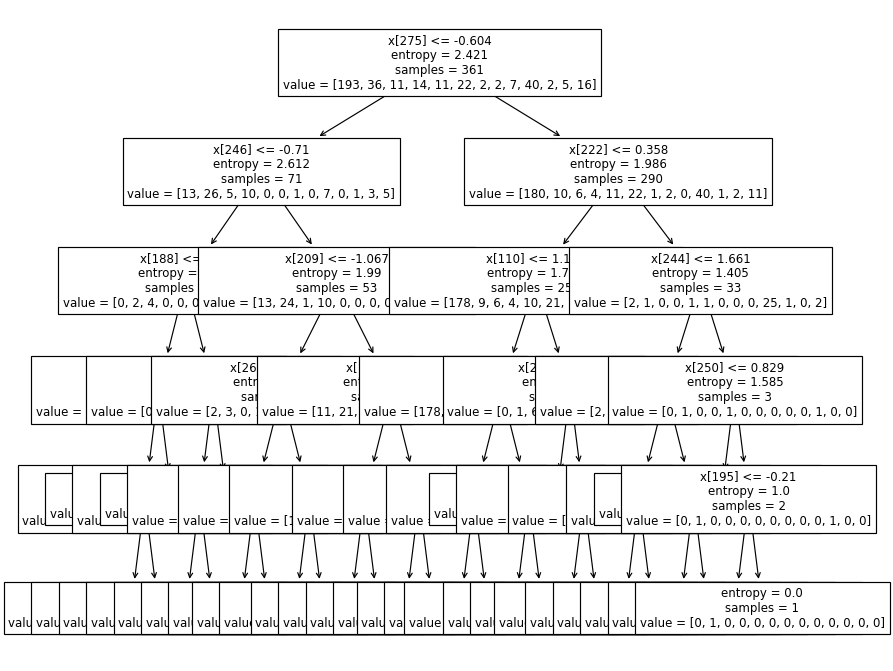

In [41]:
plt.rcParams['figure.dpi'] = 85
plt.subplots(figsize=(10, 10))
tree.plot_tree(klasifikasi_dt, fontsize=10)
plt.show()

In [42]:
result_table = pd.DataFrame(columns=['Model'])
result_table = result_table.append(pd.Series({'Model':'KNN Classifier','Train Accuracy':akurasi_train_knn,'Test Accuracy':akurasi_test_knn}),ignore_index=True)
result_table = result_table.append(pd.Series({'Model':'Decision Tree Classifier','Train Accuracy':akurasi_train_dt,'Test Accuracy':akurasi_test_dt}),ignore_index=True )
result_table

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.653740,0.637363
1,Decision Tree Classifier,0.789474,0.703297


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['Train Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['Test Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_3, *['Model'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_4, *[[['index', 'Train Accuracy'], ['Train Accuracy', 'Test Accuracy']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_5, *['index', 'count()', 'Model'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_6, *['Train Accuracy', 'count()', 'Model'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_7, *['Test Accuracy', 'count()', 'Model'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_8, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_9, *['Train Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_10, *['Test Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_11, *['index', 'Model'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_12, *['Train Accuracy', 'Model'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_13, *['Test Accuracy', 'Model'], **{'inner': 'stick'})
chart